Import Libraries

In [1]:
import numpy as np        
import pandas as pd    #data manupulation          
import matplotlib.pyplot as plt 
import seaborn as sns  #for data vizualization
from warnings import filterwarnings
filterwarnings("ignore")  #to ignore warnings
#statistical test
import missingno as msno #to plot null data
from sklearn.utils import resample  #resampling data
from sklearn.model_selection import train_test_split  #spliting the data into train and test
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
#evaluation matrix
from sklearn.metrics import confusion_matrix,classification_report  #evaluating the output 

In [2]:
data=pd.read_csv(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\data\winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### 1.fixed acidity-Fixed acidity refers to the total amount of non-volatile acids present in the wine, primarily tartaric, malic, and citric acids.
#### 2.volatile acidity-Volatile acidity is the measure of volatile acids, mainly acetic acid, in the wine.
#### 3.citric acid	-It can enhance the wine's freshness and acidity.
#### 4.residual sugar-Residual sugar is the sugar left in the wine after fermentation.
#### 5.chlorides- Chlorides are salts present in the wine and can influence the taste and mouthfeel. 
#### 6.free sulfur dioxide-Free sulfur dioxide is used in winemaking as a preservative to prevent oxidation and microbial spoilage.
#### 7.total sulfur dioxide-Total sulfur dioxide is the combined measure of free and bound sulfur dioxide in the wine. 
#### 8.density-Density is the mass per unit volume of the wine and is affected by the concentration of sugars and alcohol in the wine.
#### 9.pH-pH is a measure of the acidity or alkalinity of the wine.
#### 10.sulphates-Sulfates are compounds that can naturally occur in grapes or be added during winemaking.
#### 11.alcohol-It influences the wine's body, sweetness perception, and overall balance.
#### 12.quality-Quality in red wine is a subjective assessment based on a combination of these chemical and sensory attributes.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Exploratory Data Analysis

Target Variable

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
for i in data.columns:
    print(data[i].unique())

[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


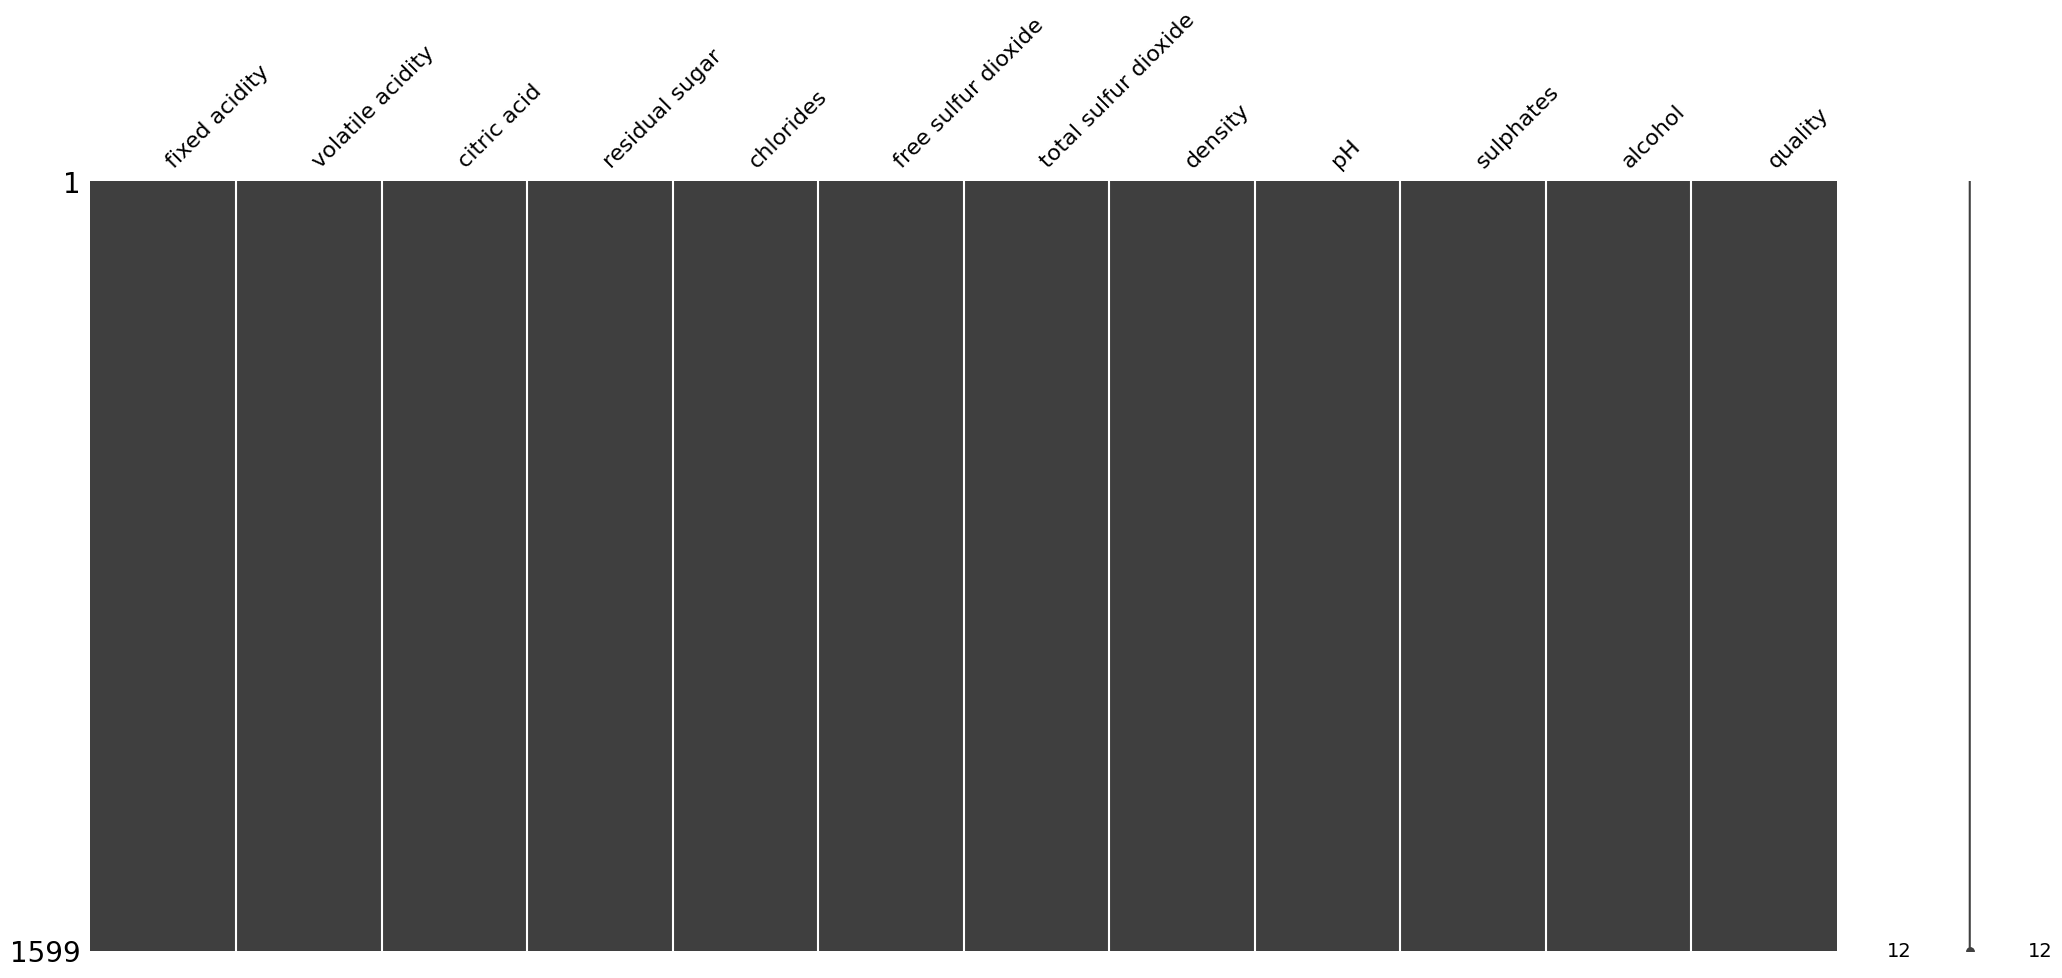

In [10]:
msno.matrix(data);

In [11]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
data.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='count'>

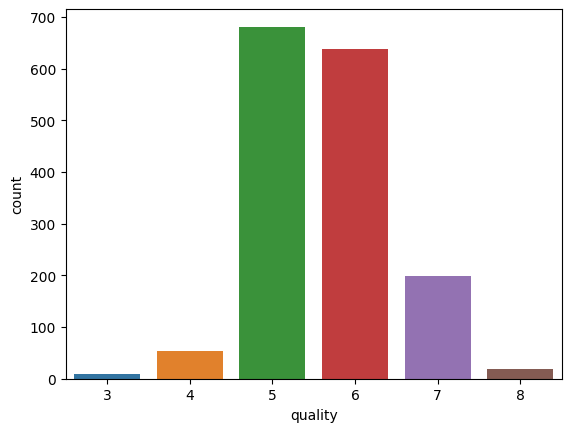

In [13]:
sns.countplot(x="quality",data=data)

### Analysis using Plots

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

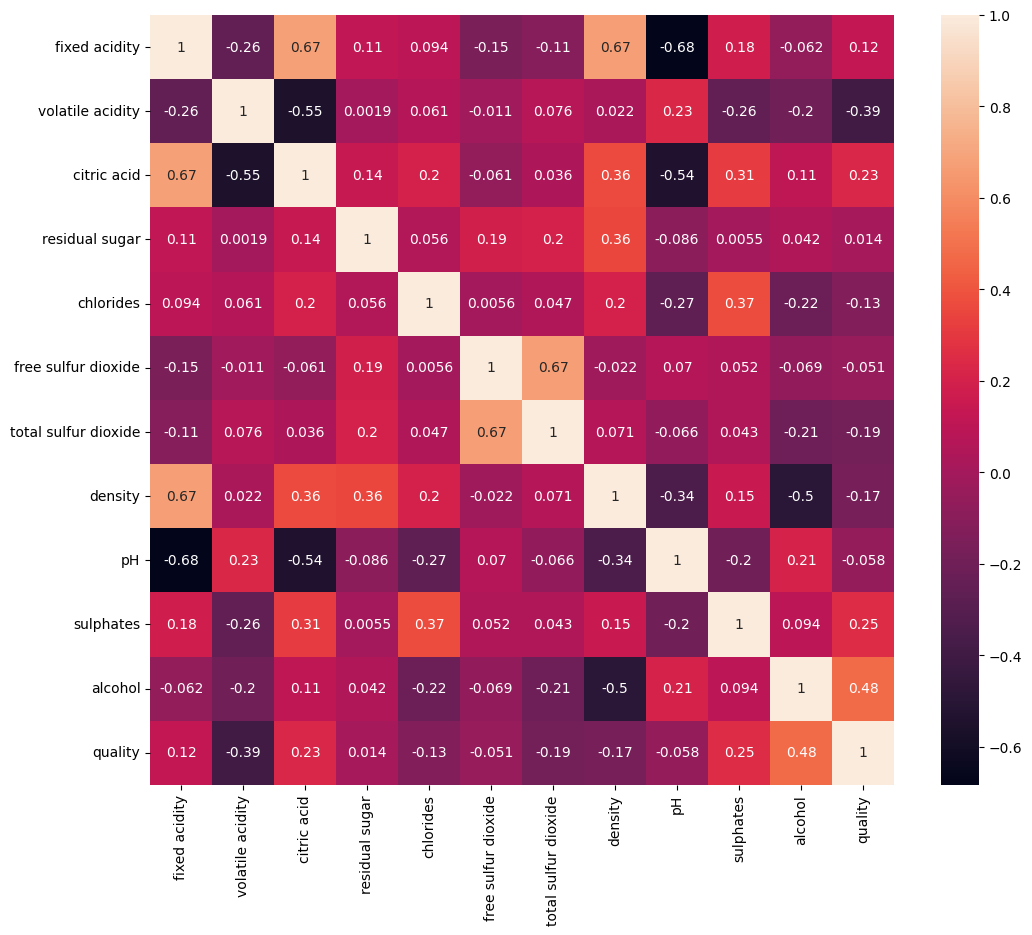

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

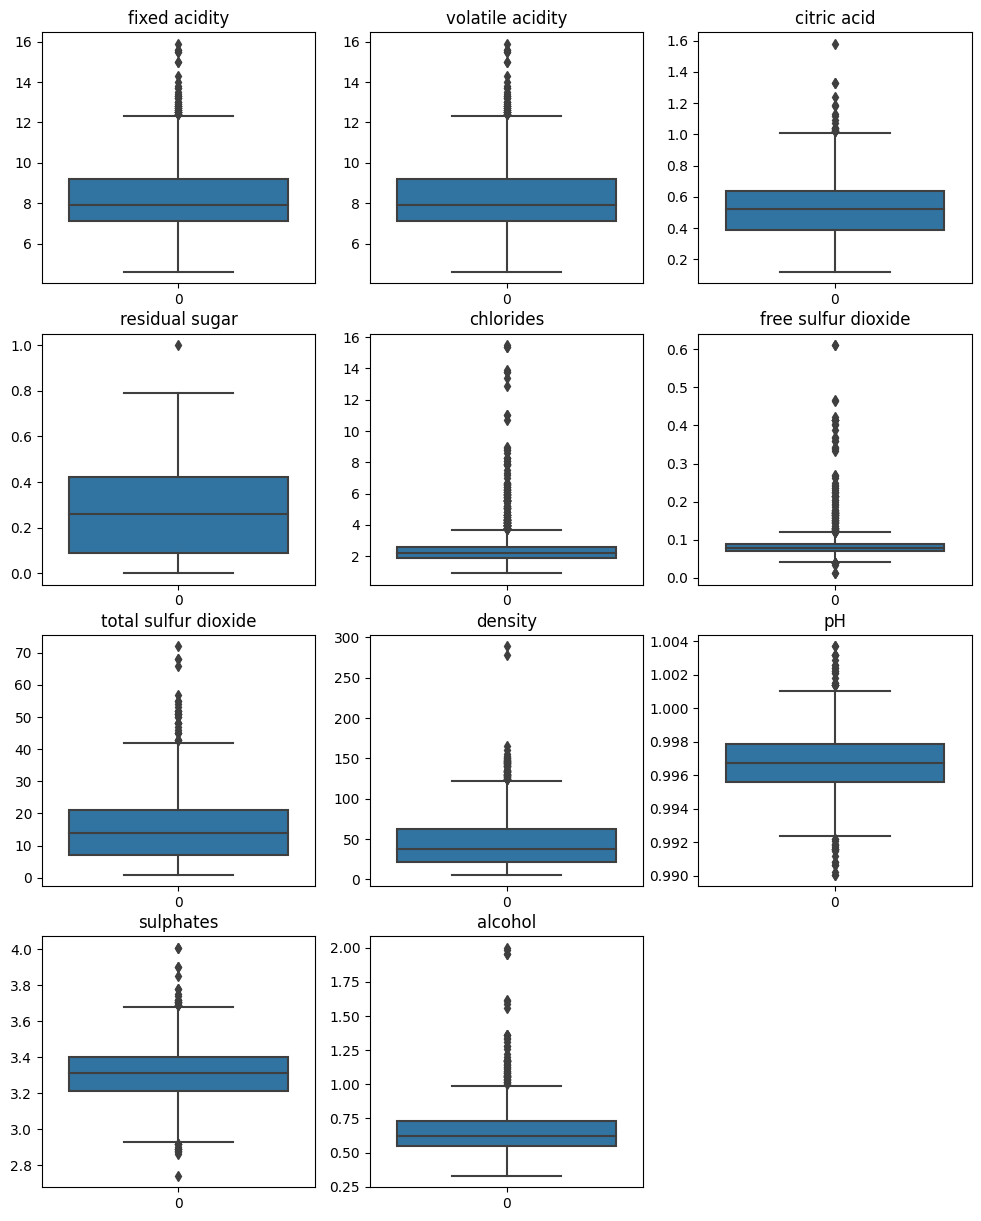

In [16]:
dc=data.columns
dc=list(dc)
dc1=dc[0]
plt.figure(figsize=(12,15))
for i in range(1,12):
    plt.subplot(4,3,i)
    sns.boxplot(data[dc1])
    plt.title(dc[0])
    dc1=dc.pop(0)

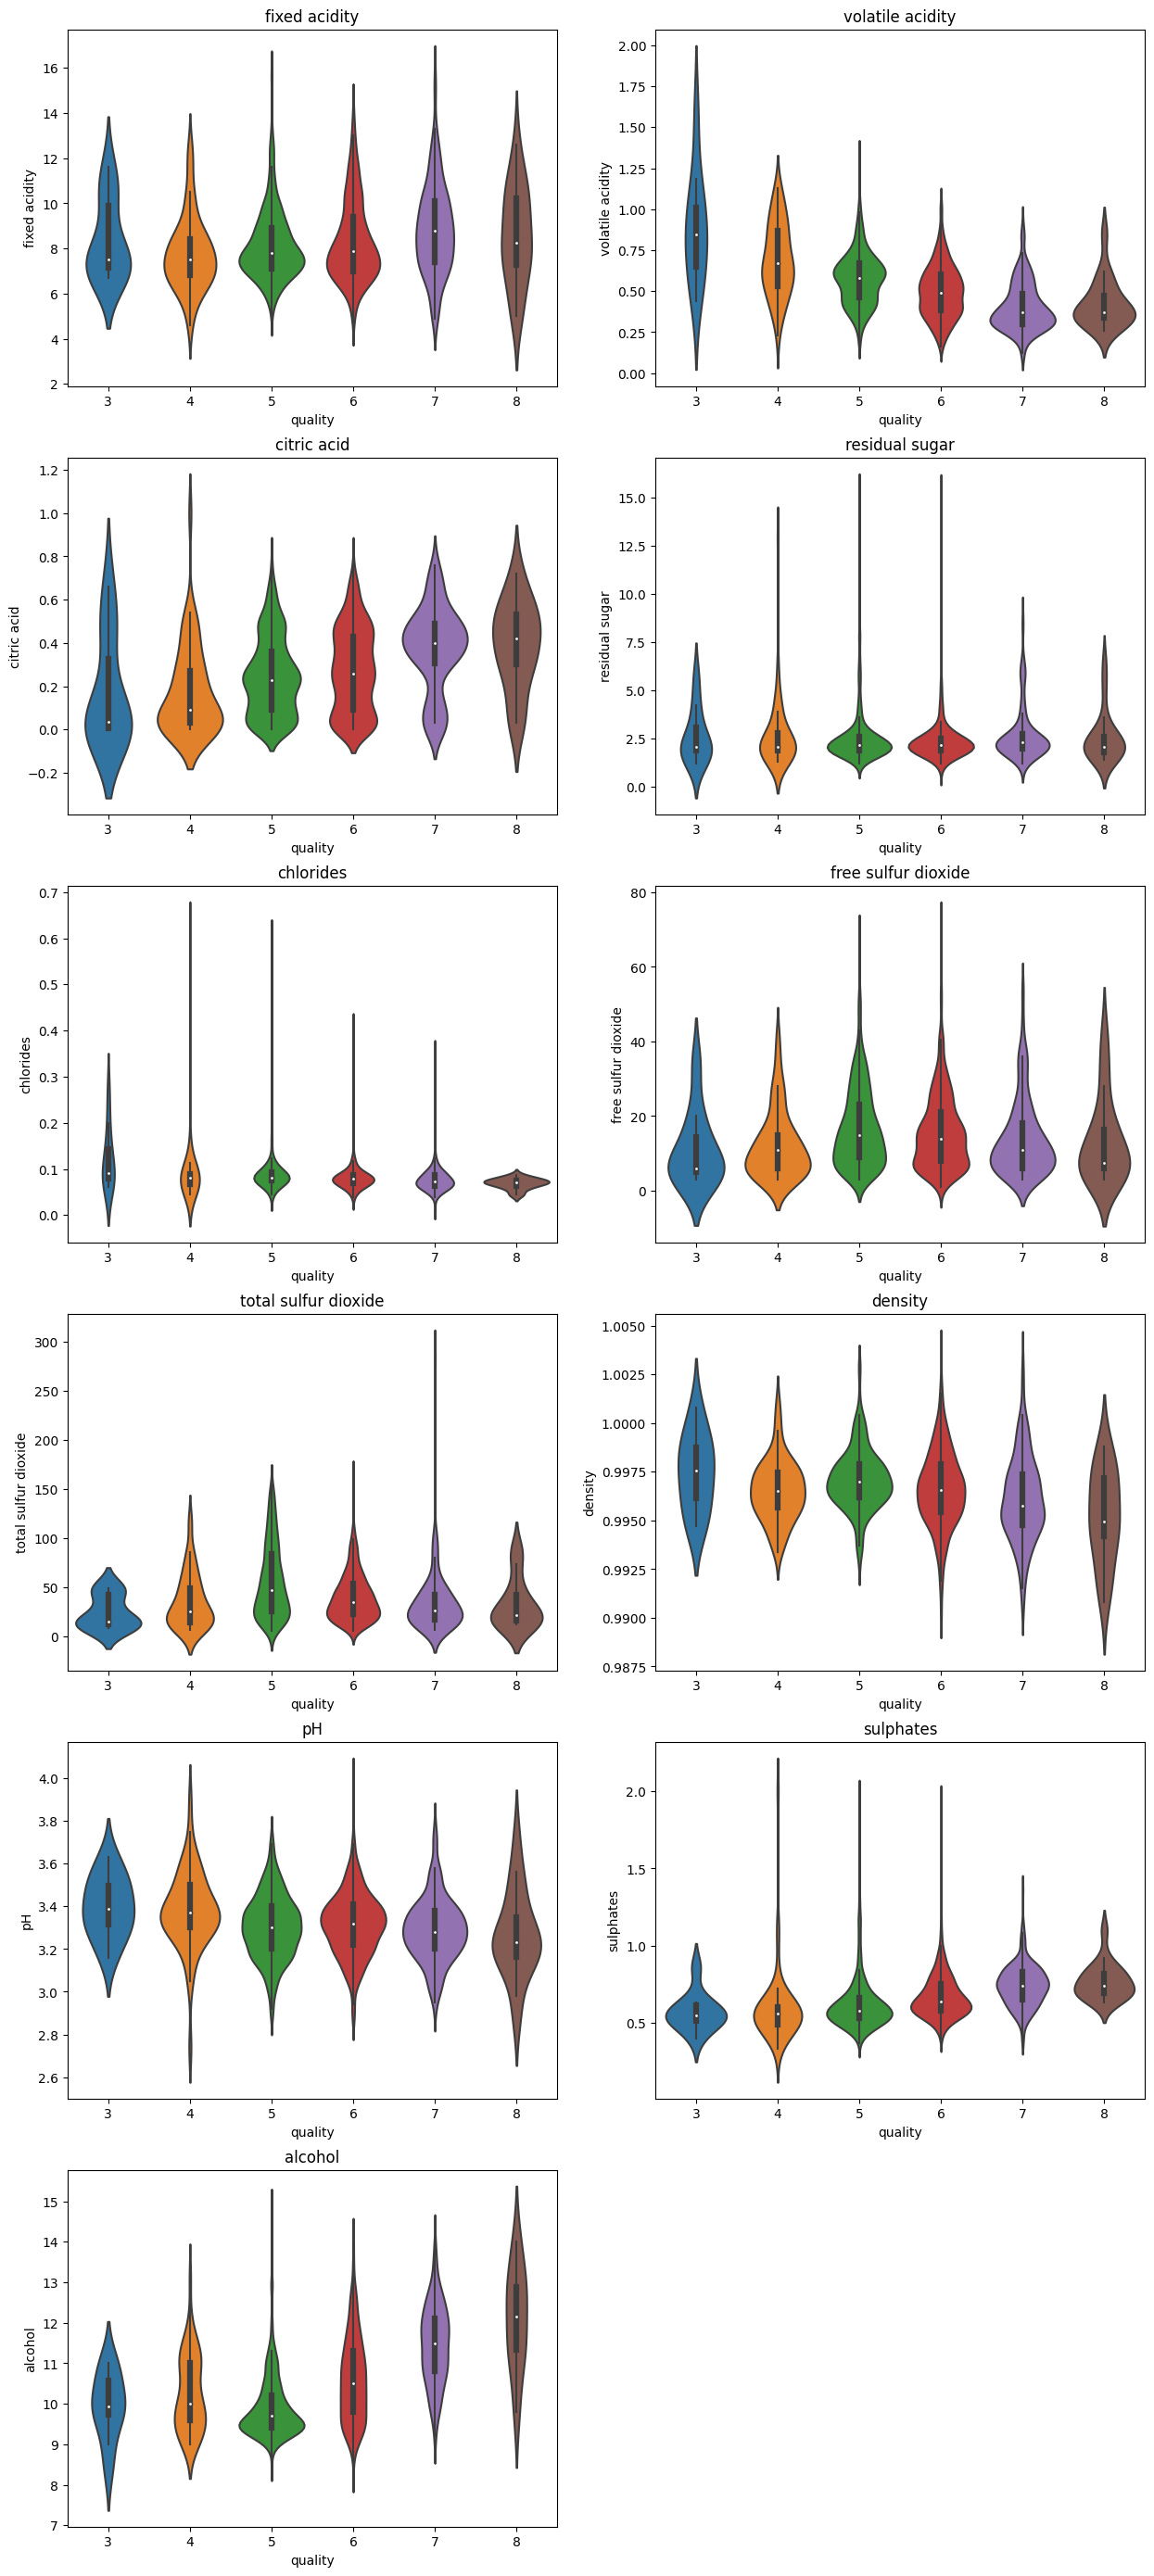

In [17]:
dc=data.columns
dc=list(dc)
dc1=dc[0]
plt.figure(figsize=(15,35))
for i in range(1,12):
    plt.subplot(6,2,i)
    sns.violinplot(x="quality",y=dc[0],data=data)
    plt.title(dc[0])
    dc1=dc.pop(0)

In [18]:
data.drop(data[data["total sulfur dioxide"]>250].index,axis=0,inplace=True)

In [19]:
data.reset_index(drop=True,inplace=True)

In [20]:
X=data.drop("quality",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
y=data.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1277, 11), (320, 11), (1277,), (320,))

In [24]:
y_train.unique()

array([7, 5, 6, 8, 4, 3], dtype=int64)

In [25]:
train = pd.concat([X_train,y_train],axis=1)
train = train.reset_index(drop=True)
num_7 = train[train.quality == 7]
print('num_7 =',len(num_7))
num_5 = train[train.quality == 5]
print('num_5 =',len(num_5))
num_6 = train[train.quality == 6]
print('num_6 =',len(num_6))
num_8 = train[train.quality == 8]
print('num_8 =',len(num_8))
num_4 = train[train.quality == 4]
print('num_4 =',len(num_4))
num_3 = train[train.quality == 3]
print('num_3 =',len(num_3))

num_7 = 154
num_5 = 559
num_6 = 503
num_8 = 14
num_4 = 40
num_3 = 7


In [26]:
num_7_upsampled= resample(num_7,replace=True,n_samples=len(num_5),random_state=27)
num_6_upsampled= resample(num_6,replace=True,n_samples=len(num_5),random_state=27)
num_8_upsampled= resample(num_8,replace=True,n_samples=len(num_5),random_state=27)
num_4_upsampled= resample(num_4,replace=True,n_samples=len(num_5),random_state=27)
num_3_upsampled= resample(num_3,replace=True,n_samples=len(num_5),random_state=27)
new_train = pd.concat([num_7_upsampled,num_5,num_6_upsampled,num_8_upsampled,num_4_upsampled,num_3_upsampled])

In [27]:
new_train.quality.value_counts()

7    559
5    559
6    559
8    559
4    559
3    559
Name: quality, dtype: int64

In [28]:
X_train=new_train.drop("quality",axis=1)
y_train=new_train["quality"]

In [29]:
DRC=DecisionTreeClassifier()
DRC.fit(X_train,y_train)
y_train_pred=DRC.predict(X_train)
y_test_pred=DRC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00       559
           5       1.00      1.00      1.00       559
           6       1.00      1.00      1.00       559
           7       1.00      1.00      1.00       559
           8       1.00      1.00      1.00       559

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354

[[559   0   0   0   0   0]
 [  0 559   0   0   0   0]
 [  0   0 559   0   0   0]
 [  0   0   0 559   0   0]
 [  0   0   0   0 559   0]
 [  0   0   0   0   0 559]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.60      0.73      0.66       122
           6       0.61      0.48      0.54       135
           7       0.52

In [30]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_train_pred=RFC.predict(X_train)
y_test_pred=RFC.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00       559
           5       1.00      1.00      1.00       559
           6       1.00      1.00      1.00       559
           7       1.00      1.00      1.00       559
           8       1.00      1.00      1.00       559

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354

[[559   0   0   0   0   0]
 [  0 559   0   0   0   0]
 [  0   0 559   0   0   0]
 [  0   0   0 559   0   0]
 [  0   0   0   0 559   0]
 [  0   0   0   0   0 559]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.09      0.08      0.08        13
           5       0.60      0.82      0.69       122
           6       0.69      0.49      0.57       135
           7       0.59

In [31]:
X=data.drop("quality",axis=1)
y=data.quality
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.38      0.07      0.12        40
           5       0.65      0.81      0.72       559
           6       0.61      0.58      0.60       503
           7       0.60      0.34      0.44       154
           8       0.00      0.00      0.00        14

    accuracy                           0.63      1277
   macro avg       0.37      0.30      0.31      1277
weighted avg       0.61      0.63      0.61      1277

[[  0   0   3   3   1   0]
 [  0   3  24  11   2   0]
 [  0   0 451 101   7   0]
 [  0   2 183 294  24   0]
 [  0   3  29  69  53   0]
 [  0   0   5   7   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.50      0.60      0.54       122
           6       0.46      0.49      0.47       135
           7       0.37

In [33]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_train_pred=adaboost.predict(X_train)
y_test_pred=adaboost.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       0.08      0.14      0.11         7
           4       0.00      0.00      0.00        40
           5       0.60      0.84      0.70       559
           6       0.53      0.51      0.52       503
           7       0.00      0.00      0.00       154
           8       0.00      0.00      0.00        14

    accuracy                           0.57      1277
   macro avg       0.20      0.25      0.22      1277
weighted avg       0.47      0.57      0.51      1277

[[  1   0   5   1   0   0]
 [  0   0  28  12   0   0]
 [  6   0 470  80   0   3]
 [  5   0 243 255   0   0]
 [  0   0  30 124   0   0]
 [  0   0   2  12   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.52      0.80      0.63       122
           6       0.50      0.46      0.48       135
           7       0.00

In [34]:
gradient_boosting = GradientBoostingClassifier(n_estimators=50,random_state=42)
gradient_boosting.fit(X_train, y_train)
y_train_pred=gradient_boosting.predict(X_train)
y_test_pred=gradient_boosting.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.65      0.79        40
           5       0.83      0.87      0.85       559
           6       0.77      0.83      0.80       503
           7       0.94      0.64      0.76       154
           8       1.00      1.00      1.00        14

    accuracy                           0.82      1277
   macro avg       0.92      0.83      0.87      1277
weighted avg       0.83      0.82      0.82      1277

[[  7   0   0   0   0   0]
 [  0  26  11   3   0   0]
 [  0   0 488  71   0   0]
 [  0   0  82 415   6   0]
 [  0   0   8  48  98   0]
 [  0   0   0   0   0  14]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.15      0.21        13
           5       0.64      0.77      0.70       122
           6       0.62      0.66      0.64       135
           7       0.81

In [35]:
data.quality.replace({5:2, 6:3, 7:4, 4:1, 8:5, 3:0},inplace=True)

In [36]:
X=data.drop("quality",axis=1)
y=data.quality
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [37]:
xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42)
xg_clf.fit(X_train, y_train)
y_train_pred=xg_clf.predict(X_train)
y_test_pred=xg_clf.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00       559
           3       1.00      1.00      1.00       503
           4       1.00      1.00      1.00       154
           5       1.00      1.00      1.00        14

    accuracy                           1.00      1277
   macro avg       1.00      1.00      1.00      1277
weighted avg       1.00      1.00      1.00      1277

[[  7   0   0   0   0   0]
 [  0  40   0   0   0   0]
 [  0   0 559   0   0   0]
 [  0   0   0 503   0   0]
 [  0   0   0   0 154   0]
 [  0   0   0   0   0  14]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        13
           2       0.60      0.79      0.68       122
           3       0.68      0.60      0.64       135
           4       0.75